<h3 style="text-align: center">MNIST dataset training (II)</h3>
<h4 style="text-align: center">fully-connected network - pytorch</h4>

In [17]:
import torch
from torchvision import datasets, transforms
import helper

import time
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
                                transforms.Normalize((0.5,), (0.5,)),
                               ])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to /home/mihai/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz

In [2]:
#image, label = next(iter(trainloader))
#helper.imshow(image[0,:]);

In [3]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

Accuracy

In [60]:
model = Classifier()

def test():

    total = []

    n=0
    # turn off gradients
    with torch.no_grad():
        # validation pass here
        for images, labels in testloader:
            n += 1
            # Get the class probabilities
            ps = torch.exp(model(images))
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy = torch.mean(equals.type(torch.FloatTensor))
            #print(accuracy.item()*100)  
            total.append(accuracy.item()*100)
            #print("Accuracy: {} %".format(accuracy.item()*100))
    
    print(np.mean(total))
    
test()    

85.91759554140127


In [61]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using:",device)
#device="cpu"
model.to(device)

# TODO: Train the network here
epochs = 7

start = time.time()

for e in range(epochs):
    print(e)
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        pass
        print(running_loss)

print("==>",device, time.time() - start)  

model.to('cpu')
images, labels = images.to('cpu'), labels.to('cpu')

test()

using: cuda
0
483.7614536136389
1
366.4123748987913
2
330.80664164572954
3
315.50032219290733
4
295.66148402541876
5
281.34696239978075
6
270.65066988021135
==> cuda 62.465914726257324
86.52468152866243


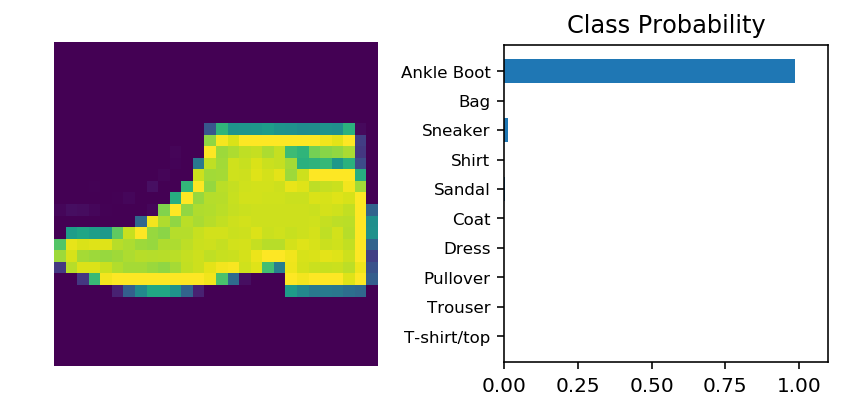

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

Save/restore NN state (weights/biases)

In [13]:
model.state_dict().keys()

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])

In [14]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [15]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())
model.load_state_dict(state_dict)

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

<p>Reference:</p>
    
<a href='https://www.udacity.com/course/deep-learning-pytorch--ud188'>Udacity: Intro to deep learning with PyTorch</a>